## Lesson 4 homework, EDA

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

file_path = "Car_Insurance_Claim.csv"
df = pd.read_csv(file_path)

## Data Cleaning

In [2]:
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True, errors='ignore')

for col in df.columns:
    if col != 'EDUCATION':
        df[col] = df[col].replace('none', pd.NA)

# Option 1: Drop only NaN values, but also drop rows where 'OUTCOME' is NaN
option_1_df = df.dropna(subset=['OUTCOME']).dropna()

# Option 2: Fill NaNs intelligently
option_2_df = df.dropna(subset=['OUTCOME']).copy()

for col in option_2_df.columns:
    if col in ['EDUCATION']:
        continue
    if option_2_df[col].dtype == 'object':
        mode_value = option_2_df[col].mode()[0]
        option_2_df[col].fillna(mode_value, inplace=True)
    else:
        median_value = option_2_df[col].median()
        option_2_df[col].fillna(median_value, inplace=True)

option_1_df = option_1_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
option_2_df = option_2_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

numeric_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
option_1_df[numeric_cols] = option_1_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
option_2_df[numeric_cols] = option_2_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

binary_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']
option_1_df[binary_cols] = option_1_df[binary_cols].astype(float).astype(int)
option_2_df[binary_cols] = option_2_df[binary_cols].astype(float).astype(int)

# Display the number of remaining rows for both options
len(option_1_df), len(option_2_df)


C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\1154056058.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  option_2_df[col].fillna(mode_value, inplace=True)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\1154056058.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  option_1_df = option_1_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\1154056058.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use Data

(6918, 9900)

As we see, we are losing about 30% of data, if we are dropping the rows, that consist 'none' value, so, in my opinion, it is better to fill it with the most frequent values across dataframe.

### Final dataset

In [3]:
df = pd.read_csv(file_path)

df.drop(columns=['Unnamed: 0', 'ID'], inplace=True, errors='ignore')

for col in df.columns:
    if col != 'EDUCATION':
        df[col] = df[col].replace('none', pd.NA)

df.dropna(subset=['OUTCOME'], inplace=True)

for col in df.columns:
    if col == 'EDUCATION':  
        continue  # Keep 'none' as a valid category
    if df[col].dtype == 'object':
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    else:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

numeric_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

binary_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']
df[binary_cols] = df[binary_cols].astype(float).astype(int)


df.head()


C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4277014992.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4277014992.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765.0,12000.0,sedan,2,0,1,1


## Descriptive Statistics

In [4]:
numeric_summary = df.describe()

print("Summary Statistics for Numeric Columns:")
display(numeric_summary.style.format("{:,.2f}"))  # Format numbers with 2 decimal places


outcome_distribution = df['OUTCOME'].value_counts(normalize=True) * 100  # Percentage

print("\nClass Distribution for 'OUTCOME':")
display(outcome_distribution.to_frame().style.format("{:,.2f}").hide(axis="index"))  # Use display() for Jupyter


Summary Statistics for Numeric Columns:


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,"9,900.00","9,900.00","9,900.00","9,900.00","9,900.00","9,900.00","9,900.00","9,900.00","9,900.00"
mean,0.47,0.70,0.49,0.69,"11,630.30",1.46,0.24,1.05,0.31
std,0.19,0.46,0.50,0.46,"2,678.61",2.23,0.55,1.65,0.46
min,0.05,0.00,0.00,0.00,"2,000.00",0.00,0.00,0.00,0.00
25%,0.37,0.00,0.00,0.00,"10,000.00",0.00,0.00,0.00,0.00
50%,0.50,1.00,0.00,1.00,"11,000.00",0.00,0.00,0.00,0.00
75%,0.61,1.00,1.00,1.00,"13,000.00",2.00,0.00,2.00,1.00
max,0.96,1.00,1.00,1.00,"22,000.00",22.00,6.00,15.00,1.00



Class Distribution for 'OUTCOME':


proportion
68.64
31.36


Most customers have 0 past accidents and 0 DUIs.

The median speeding violations are 0, but some people have up to ✨22 violations✨

The "OUTCOME" column suggests that only about 31% of customers filed a claim.

In [5]:
categorical_summary = df.select_dtypes(include=['object']).nunique()

most_frequent = df.select_dtypes(include=['object']).mode().iloc[0]  # .iloc[0] gives the first row (the mode)

categorical_summary_df = categorical_summary.to_frame(name='Unique Count')
categorical_summary_df['Most Frequent Value'] = most_frequent

print("\nUnique Value Counts and Most Frequent Value for Categorical Columns:")
display(categorical_summary_df)


Unique Value Counts and Most Frequent Value for Categorical Columns:


,Unique Count,Most Frequent Value
AGE,4,26-39
GENDER,2,female
RACE,2,majority
DRIVING_EXPERIENCE,4,0-9y
EDUCATION,3,high school
INCOME,4,upper class
VEHICLE_YEAR,2,before 2015
POSTAL_CODE,8,10238
VEHICLE_TYPE,2,sedan


Most customers are aged 26-39, have 0-9 years of driving experience, and own a car (previous table).

The majority of vehicles are older (before 2015).

The most common education level is "high school".

## Visualization

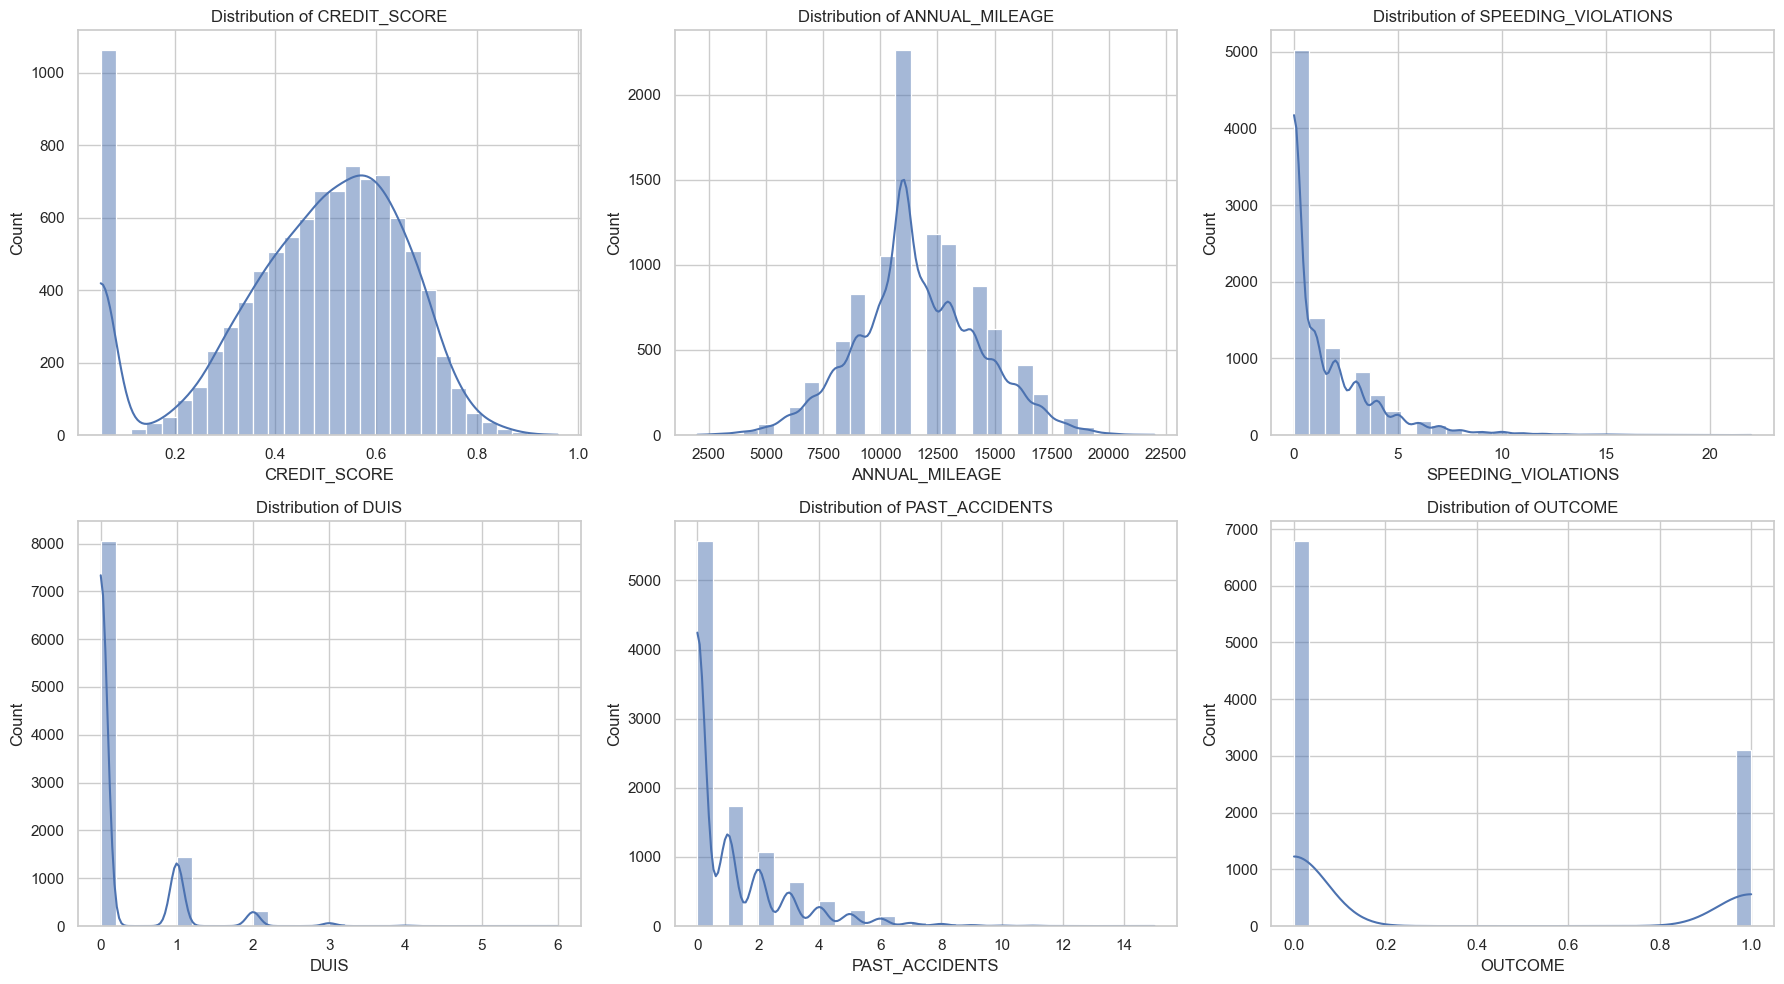

C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4006303346.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=30)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4006303346.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=30)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4006303346.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=30)
C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4006303346.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

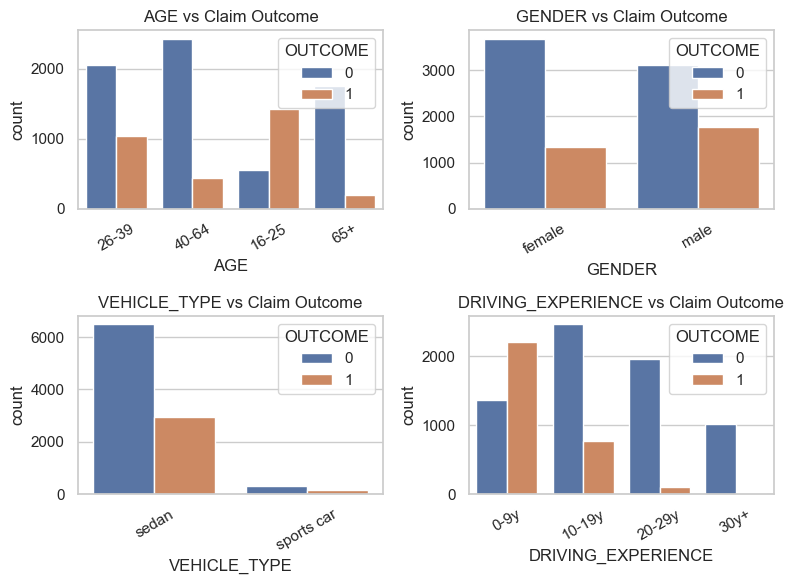

C:\Users\ilchi\AppData\Local\Temp\ipykernel_16140\4006303346.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30)


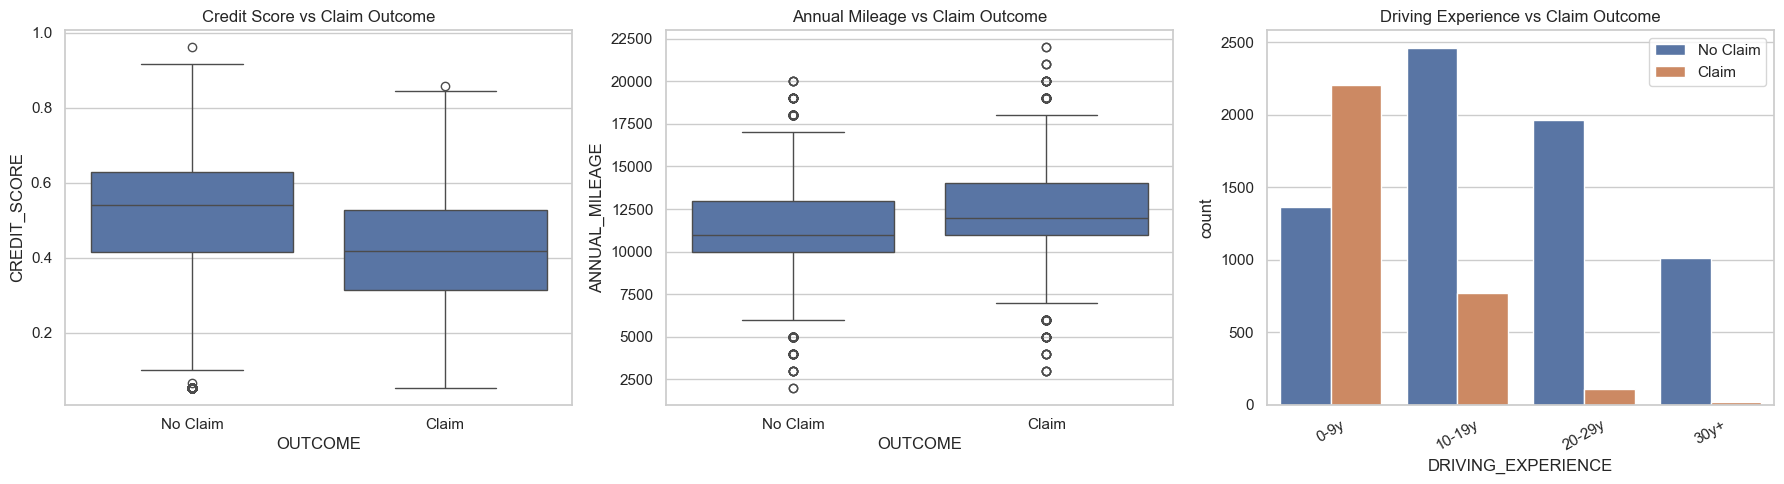

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### GENERAL VISUALIZATIONS ###

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
num_cols = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### RELATIONSHIP-BASED VISUALIZATIONS ###

cat_cols = ["AGE", "GENDER", "VEHICLE_TYPE", "DRIVING_EXPERIENCE"]
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue="OUTCOME", order=df[col].value_counts().index, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"{col} vs Claim Outcome")
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x="OUTCOME", y="CREDIT_SCORE", ax=axes[0])
axes[0].set_title("Credit Score vs Claim Outcome")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Claim", "Claim"])

sns.boxplot(data=df, x="OUTCOME", y="ANNUAL_MILEAGE", ax=axes[1])
axes[1].set_title("Annual Mileage vs Claim Outcome")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No Claim", "Claim"])

sns.countplot(data=df, x="DRIVING_EXPERIENCE", hue="OUTCOME", ax=axes[2])
axes[2].set_title("Driving Experience vs Claim Outcome")
axes[2].legend(["No Claim", "Claim"])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()



## Conclusions

### **Why People Didn't File Claims**

1. **No Major Accidents**  
   Many customers didn’t experience accidents serious enough to file a claim.

2. **High Deductibles**  
   Customers might avoid filing claims if the deductible is too high and choose to pay out of pocket instead.

3. **Good Driving Habits**  
   People with good driving records (e.g., high credit scores, fewer violations, more experience) tend to avoid claims.

4. **Older Vehicles**  
   For older cars, the cost of repairs may not justify filing a claim.

### **Final Thoughts**  
The **main reasons why claims were not made** are likely:  
✅ **Customers driving safely (good credit score, fewer violations, more experience).**  
✅ **Avoiding claims due to high deductibles or premium increases.**  
✅ **Older vehicles where minor damages don’t justify a claim.**  

To **improve policies**, the insurance company should focus on **offering better deals to low-risk drivers** and **adjusting deductibles or educating customers about claim benefits**.